# Install MongoDB


In [2]:
# MongoDB download and installation
# Downloads MongoDB from official repository
!wget https: // fastdl.mongodb.org/linux/mongodb-linux-x86_64-debian71-3.0.15.tgz
!tar xfv mongodb-linux-x86_64-debian71-3.0.15.tgz     # Unpack compressed file
!rm mongodb-linux-x86_64-debian71-3.0.15.tgz          # Removes downloaded file

# Default location of database is "/data/db" folder
!mkdir / data                                          # data folder creation
# db folder creation inside data
!mkdir / data/db


--2022-05-08 10:12:44--  https://fastdl.mongodb.org/linux/mongodb-linux-x86_64-debian71-3.0.15.tgz
Resolving fastdl.mongodb.org (fastdl.mongodb.org)... 65.8.248.127, 65.8.248.41, 65.8.248.71, ...
Connecting to fastdl.mongodb.org (fastdl.mongodb.org)|65.8.248.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70878938 (68M) [application/x-gzip]
Saving to: ‘mongodb-linux-x86_64-debian71-3.0.15.tgz’

mongodb-linux-x86_6 100%[===================>]  67.59M   112MB/s    in 0.6s    

2022-05-08 10:12:45 (112 MB/s) - ‘mongodb-linux-x86_64-debian71-3.0.15.tgz’ saved [70878938/70878938]

mongodb-linux-x86_64-debian71-3.0.15/README
mongodb-linux-x86_64-debian71-3.0.15/THIRD-PARTY-NOTICES
mongodb-linux-x86_64-debian71-3.0.15/GNU-AGPL-3.0
mongodb-linux-x86_64-debian71-3.0.15/bin/mongodump
mongodb-linux-x86_64-debian71-3.0.15/bin/mongorestore
mongodb-linux-x86_64-debian71-3.0.15/bin/mongoexport
mongodb-linux-x86_64-debian71-3.0.15/bin/mongoimport
mongodb-linux-x86_64-debia

# Run MongoDB Server in Background


In [ ]:
! nohup mongodb-linux-x86_64-debian71-3.0.15/bin/mongod - -nojournal - -dbpath / data/db &


nohup: appending output to 'nohup.out'


# Install pymongo


In [1]:
! python - m pip install pymongo == 3.7.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.6/628.6 KB 2.0 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done

# Connect Client to Server


In [5]:
import datetime
import pymongo
from pymongo import MongoClient
uri = 'localhost:27017'

client = pymongo.MongoClient(uri)

# Select a database
# mydb = client["mydatabase"] # or using client.mydatabase


# Homework


#### 3. Use client.list_database_names() What is the statement used for? Show your result.


In [ ]:
print(client.list_database_names())
# OR
print(client.database_names())


['local']
['local']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: database_names is deprecated. Use list_database_names instead.
  This is separate from the ipykernel package so we can avoid doing imports until


#### 4. Select "labdb" to be used. What is the command?


In [ ]:
db = client.labdb


#### 5. Select "labcollection" from your selected "labdb". Show your result.


In [ ]:
collection =


#### 6. Then, use list_database_names() again. What do you see? Show your result. What will happen after we type the db = client.labdb (to use labdb) statement in Q.4 to select a database with no existence of that database?


In [ ]:
client.list_database_names()


#### 7. Show your collections. What is the statment?


#### 8. Type collection.insert_one({name:’testCreateCollection’}) to insert data {name:’testCreateCollection’} to the “labcollection”. Show your capture.


#### 9. Type db.labcollection2.insert_one({'name' : 'testCreateCollection2'})


##### 9.1 Then show all the colllections in the database. Do you see a new collection “labcollections2” just created?


#### 10. What will happen if you use the insert command to add data to a collection which has not been created before inserting the data? Briefly explain.

**ANS:**


#### 11. Type drop both the collections (labcollection and labcollection2) by using **db.COLLECTION_NAME.drop()** . Show what collections left.


#### 12. Create a collection name “stock”. Show your command.


#### 13. Insert a document into the “stock” collection by using the following


In [ ]:
# collection.insert_one({\
#                              'item': "tshirt",\
#                              'details': {\
#                                        'model': "S321",\
#                                        'manufacturer': "KMUTT Company"
#                                        },\
#                              'stock': [ { 'size': "S", 'qty': 20 },\
#                                        { 'size': "M", 'qty': 15 } ],\
#                             'category': "clothing",\
#                             'price':100\
#                             })


##### 13.1 Run the below statments. What are result.acknowledged and result.inserted_id?

Hint. WriteResult in pymongo is the object which is the return value when we call any funciton (i.e. drop, insert, update)
https://api.mongodb.com/python/current/api/pymongo/results.html


In [ ]:
print(result.acknowledged)
print(result.inserted_id)


#### 14. Then insert the following items into the “stock” collection by using one insert command or multiple insert commands. Use the previous document as example

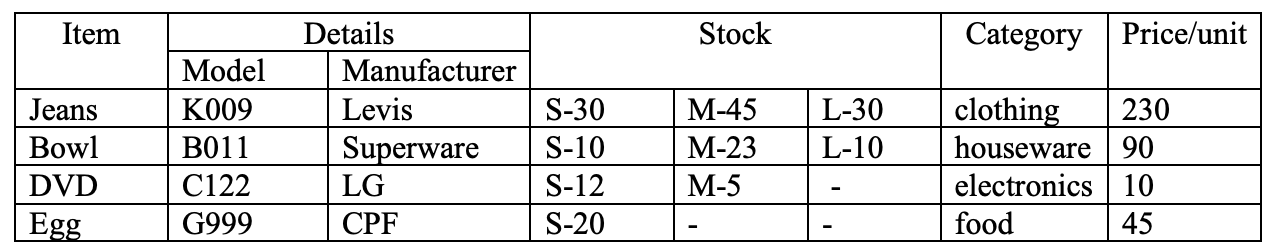


#### 15. Type "print (list(collection.find()))". What is find() used for?


In [ ]:
# For better presentation, change the list to dataframe
import pandas as pd
pd.options.display.max_columns = 10
df = pd.DataFrame(list(collection.find()))
print(df)


#### 16. Use collection.find( { 'category': 'clothing' }). Show your result. What items do you get from executing the command?


#### 17. Use collection.find( { 'category': 'clothing', 'price': { '$lt': 100 } }). What do you get?


#### 18. Show your command if you would like to search for any item which its price is greater than 50.


#### 19. Find all items that have size “S”


#### 20. Show your command and result if you would like to find items which have size M and their quantity is greater than 10. Hint: Using $elemMatch for matching documents that contain an array field.


#### 21. Show your command if you would like to find the same items in Step 20 but only fields “item”, “category”, and “price” sorted by “price” in ascending order are shown in the result set. Note that by default, the \_id field is included in the results. To suppress the \_id field from the result set, specify \_id: 0 in the projection document.


#### 22. For the document with item equal to "DVD", use the $set operator to update the category field and the details field to the specified values shown below. Show your capture and all the documents.


#### 23. Use the following command to change the manufacture of the Egg item. Show the result of your change.


#### 24. Remove items with category “clothing” by using remove(). Show your result and all the documents left.


#### 25. Remove all the documents from the collection. Show the command.


#### 26. Remove the collection from the database. Show the command.


#### 27. Remove the database. Show the command.


# Homework MongoDB 2


In [2]:
from pprint import pprint
db = client.labdb2
db


Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'labdb2')

In [283]:
################
# Create data according to sample data
################
subjects_teacher = [
    {
        '_id': 'G001',
        'group_name': 'International Section',
        'subjects': [
            {
                'subject_id': 'CPE332',
                'subject_name': 'Database Systems',
                'teachers': [
                    {
                        'teacher_id': 'T001',
                        'teacher_firstname': 'Khajonpong',
                        'teacher_lastname': 'Akkarajitsakul',
                    },
                ],
            },
            {
                'subject_id': 'CPE333',
                'subject_name': 'Software Engineering',
                'teachers': [
                    {
                        'teacher_id': 'T002',
                        'teacher_firstname': 'Phond',
                        'teacher_lastname': 'Phunchongharn',
                    }
                ],
            }
        ],
        'students': [
            {
                'student_id': 'S001',
                'student_firstname': 'Aran',
                'student_lastname': 'Bundit',
                'marks': [
                    {
                        'mark_id': '001',
                        'subject_id': 'CPE332',
                        'date': datetime.datetime(2016, 11, 16),
                        'mark': 70
                    },
                    {
                        'mark_id': '004',
                        'subject_id': 'CPE333',
                        'date': datetime.datetime(2016, 11, 16),
                        'mark': 50
                    }
                ]
            }
        ]
    },
    {
        '_id': 'G002',
        'group_name': 'Thai Section',
        'subjects': [
            {
                'subject_id': 'CPE332',
                'subject_name': 'Database Systems',
                'teachers': [
                    {
                        'teacher_id': 'T001',
                        'teacher_firstname': 'Khajonpong',
                        'teacher_lastname': 'Akkarajitsakul',
                    },
                ]
            },
            {
                'subject_id': 'CPE333',
                'subject_name': 'Software Engineering',
                'teachers': [
                    {
                        'teacher_id': 'T001',
                        'teacher_firstname': 'Khajonpong',
                        'teacher_lastname': 'Akkarajitsakul',
                    },
                    {
                        'teacher_id': 'T002',
                        'teacher_firstname': 'Phond',
                        'teacher_lastname': 'Phunchongharn',
                    }
                ]
            }
        ],
        'students': [
            {
                'student_id': 'S002',
                'student_firstname': 'Arin',
                'student_lastname': 'Akkara',
                'marks': [
                    {
                        'mark_id': '002',
                        'subject_id': 'CPE332',
                        'date': datetime.datetime(2016, 11, 16),
                        'mark': 72
                    },
                    {
                        'mark_id': '005',
                        'subject_id': 'CPE333',
                        'date': datetime.datetime(2016, 11, 16),
                        'mark': 55
                    }
                ]
            },
            {
                'student_id': 'S003',
                'student_firstname': 'Aree',
                'student_lastname': 'Rukdee',
                'marks': [
                    {
                        'mark_id': '003',
                        'subject_id': 'CPE332',
                        'date': datetime.datetime(2016, 11, 16),
                        'mark': 95
                    },
                    {
                        'mark_id': '006',
                        'subject_id': 'CPE333',
                        'date': datetime.datetime(2016, 11, 16),
                        'mark': 20
                    }
                ]
            }
        ]
    }
]


#### Insert Data into Mongodb


In [284]:
db.class_info.drop()
insert_result = db.class_info.insert_many(subjects_teacher)
list(db.class_info.find())


[{'_id': 'G001',
  'group_name': 'International Section',
  'subjects': [{'subject_id': 'CPE332',
    'subject_name': 'Database Systems',
    'teachers': [{'teacher_id': 'T001',
      'teacher_firstname': 'Khajonpong',
      'teacher_lastname': 'Akkarajitsakul'}]},
   {'subject_id': 'CPE333',
    'subject_name': 'Software Engineering',
    'teachers': [{'teacher_id': 'T002',
      'teacher_firstname': 'Phond',
      'teacher_lastname': 'Phunchongharn'}]}],
  'students': [{'student_id': 'S001',
    'student_firstname': 'Aran',
    'student_lastname': 'Bundit',
    'marks': [{'mark_id': '001',
      'subject_id': 'CPE332',
      'date': datetime.datetime(2016, 11, 16, 0, 0),
      'mark': 70},
     {'mark_id': '004',
      'subject_id': 'CPE333',
      'date': datetime.datetime(2016, 11, 16, 0, 0),
      'mark': 50}]}]},
 {'_id': 'G002',
  'group_name': 'Thai Section',
  'subjects': [{'subject_id': 'CPE332',
    'subject_name': 'Database Systems',
    'teachers': [{'teacher_id': 'T001',


#### What is average score of each group


In [272]:
list(db.class_info.aggregate([
    {
        '$unwind': '$students'
    },
    {
        '$unwind': '$students.marks'
    },
    {
        '$group': {
            '_id': '$_id',
            'group_name': {
                '$first': '$group_name'
            },
            'average': {
                '$avg': '$students.marks.mark'
            }
        }
    }
]))

[{'_id': 'G001', 'group_name': 'International Section', 'average': 60.0},
 {'_id': 'G002', 'group_name': 'Thai Section', 'average': 60.5}]

#### What is average score of each subject


In [278]:
list(db.class_info.aggregate([
    {
        '$unwind': '$students'
    },
    {
        '$unwind': '$students.marks'
    },
    {
        '$group': {
            '_id': '$students.marks.subject_id',
            'average': {
                '$avg': '$students.marks.mark'
            }
        }
    }
]))


[{'_id': 'CPE332', 'average': 79.0},
 {'_id': 'CPE333', 'average': 41.666666666666664}]

#### Who is the student getting the highest marks among all groups and subjects? and Who is his or her teacher ?


In [323]:
list(db.class_info.aggregate([
    {
        '$unwind': '$students'
    },
    {
        '$unwind': '$students.marks'
    },
    {
        '$unwind': '$subjects'
    },
    {
        '$sort': {
            'students.marks.mark': -1
        }
    },
    {
        '$limit': 1
    },
    {
        '$project': {
            '_id': 1,
            'student_name': {
                '$concat': ['$students.student_firstname', ' ', '$students.student_lastname']
            },
            'mark': '$students.marks.mark',
            'teachers': '$subjects.teachers'
        }
    }
]))


[{'_id': 'G002',
  'student_name': 'Aree Rukdee',
  'mark': 95,
  'teachers': [{'teacher_id': 'T001',
    'teacher_firstname': 'Khajonpong',
    'teacher_lastname': 'Akkarajitsakul'}]}]

# Finally, Shutdown mongo db server


In [ ]:
# Shutdown mongoDB server
!mongodb-linux-x86_64-debian71-3.0.15/bin/mongo admin - -eval 'db.shutdownServer()'
